## Project Overview

### Context
Prediksi hujan hari berikutnya dengan melatih model klasifikasi pada variabel target RainTomorrow.

### Content
Kumpulan data ini berisi sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi diseluruh Australia. RainTomorrow adalah variabel target untuk diprediksi. Artinya apakah hari berikutnya hujan, Ya atau Tidak?

### Source & Acknowledgements
Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

### Attribute Information
Attribute Information:
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 9 pagi
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi


## Import Module

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
data = pd.read_csv('../dataset/weatherAUS.csv')
data.reset_index(inplace=True)

In [3]:
data.drop(columns='index', axis=1, inplace=True)

In [4]:
data.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


Cek informasi mengenai dataset yang kita miliki.

In [5]:
data.shape

(145460, 23)

Jumlah data ini <b>145.460</b> baris dengan <b>23 kolom</b>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Pada informasi diatas, dapat dilihat bahwa banyak sekali kolom yang mengandung Null atau NaN values. Maka dari itu kita harus mengatasinya terlebih dahulu.

## Data Cleaning

In [7]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Day'] = pd.DatetimeIndex(data['Date']).day

In [8]:
data.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2


### Handle Missing Values

In [9]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

In [10]:
percentage_of_na = pd.DataFrame(round(data.isnull().sum() / len(data) * 100, 2))
percentage_of_na.rename(columns={0:'percentage of missing values'})

,percentage of missing values
Date,0.00
Location,0.00
MinTemp,1.02
MaxTemp,0.87
Rainfall,2.24
Evaporation,43.17
Sunshine,48.01
WindGustDir,7.10
WindGustSpeed,7.06
WindDir9am,7.26


Pada bagian ini, kita cek terlebih dahulu ada berapa persen total missing value pada masing masing kolom di dataset ini. Hasilnya ada banyak sekali missing values pada dataset ini. Mari kita atasi kolom per kolom nya.

In [11]:
# Drop row that has more than 30% missing values
data.dropna(subset='Evaporation', inplace=True)
data.dropna(subset='Sunshine', inplace=True)
data.dropna(subset='Cloud9am', inplace=True)
data.dropna(subset='Cloud3pm', inplace=True)

Setelah mempertimbangkan berbagai cara, data ini akhirnya akan di drop karna data yang hilang lebih dari 30%.

In [12]:
data.dropna(subset='RainToday', inplace=True)
data.dropna(subset='RainTomorrow', inplace=True)

Pada kolom <b>RainToday</b> dan <b>RainTomorrow</b> akan kita drop, karna kolom itu merupakan kolom utama dari dataset ini.

In [13]:
# List untuk kolom categorical
col_cat_na = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [14]:
for col in col_cat_na:
    data[col].fillna(data[col].mode, inplace=True)

Untuk mengatasi data yang hilang pada kolom categorical, kita melakukan looping pada setiap kolom dan mengisi kolom categorical ini dengan mode pada setiap kolomnya.

In [15]:
data.select_dtypes(include=float).columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [16]:
for col in data.select_dtypes(include=float).columns:
    data[col].fillna(data[col].median(), inplace=True)

Menghandle missing value pada numerical kolom. Diisi menggunakan median.

In [17]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [18]:
data.shape

(62294, 26)

Setelah kita lakukan data cleaning, maka kita akan mendapatkan data <b>62294</b>

### Identify Duplicated Data

In [19]:
data.duplicated().any()

False

Setelah di cek duplikasi data pada dataset ini, ternyata pada dataset ini tidak terdapat data yang duplikasi.

### Handle Outliers

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

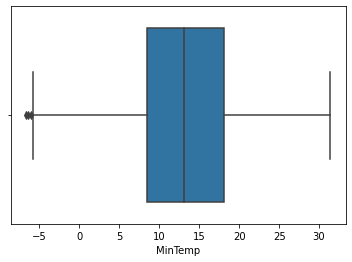

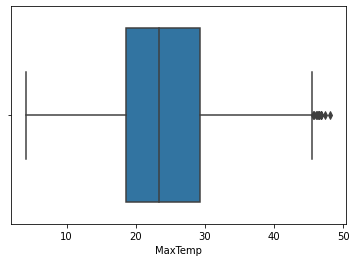

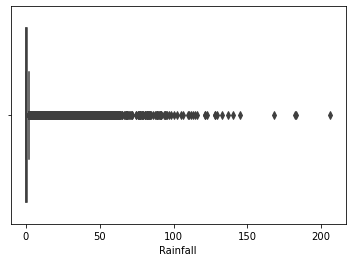

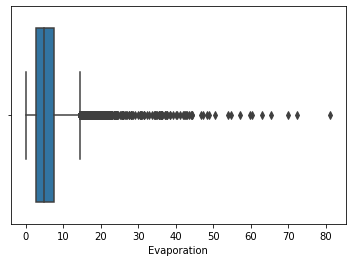

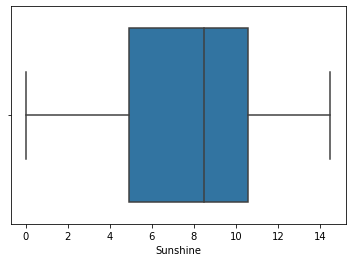

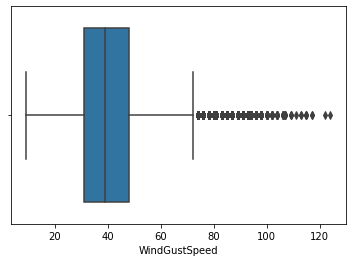

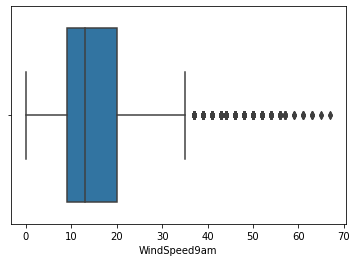

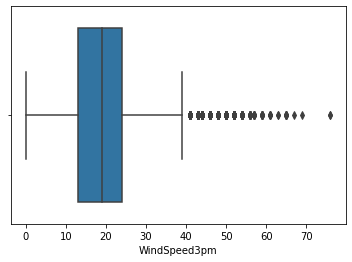

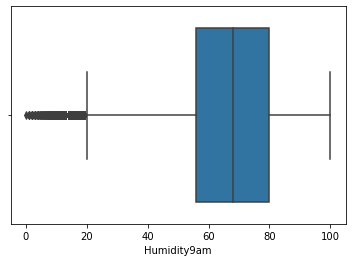

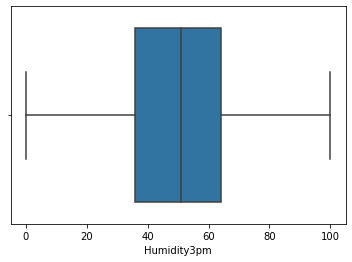

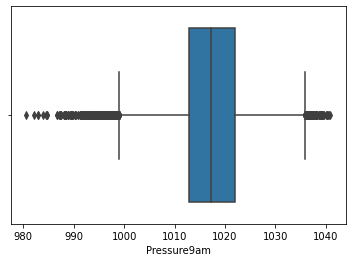

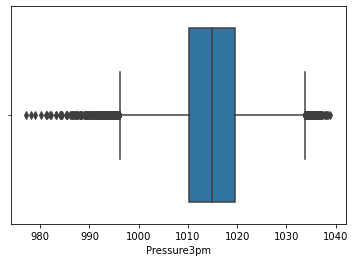

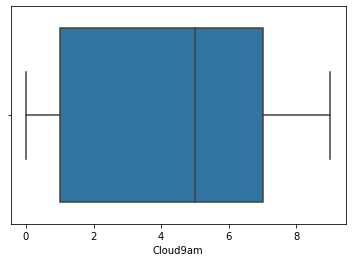

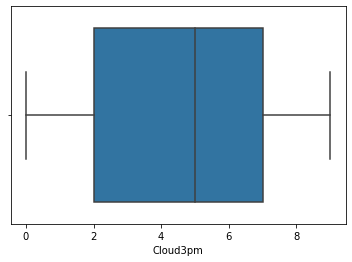

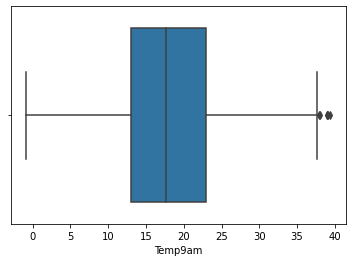

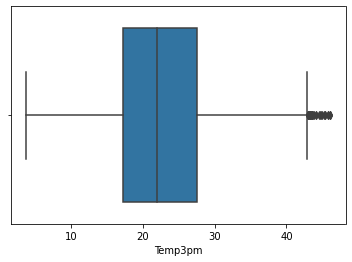

In [21]:
for col in data.select_dtypes(include=float).columns:
    plt.figure()
    sns.boxplot(x=data[col])
plt.show()

In [22]:
Q1 = data[data.select_dtypes(include=float).columns].quantile(0.25)
Q3 = data[data.select_dtypes(include=float).columns].quantile(0.75)

IQR = Q3-Q1

In [23]:
minimum = Q1-(1.5*IQR)
maximum = Q3+(1.5*IQR)

Untuk menghandle outliers ada banyak cara, salah satu yang dipakai pada saat ini adalah metode IQR atau Interquartile Range. 

In [24]:
print(minimum)
print('=' * 40)
print(maximum)

MinTemp           -5.90
MaxTemp            2.30
Rainfall          -1.20
Evaporation       -4.10
Sunshine          -3.65
WindGustSpeed      5.50
WindSpeed9am      -7.50
WindSpeed3pm      -3.50
Humidity9am       20.00
Humidity3pm       -6.00
Pressure9am      999.00
Pressure3pm      996.10
Cloud9am          -8.00
Cloud3pm          -5.50
Temp9am           -1.85
Temp3pm            1.75
dtype: float64
MinTemp            32.50
MaxTemp            45.50
Rainfall            2.00
Evaporation        14.30
Sunshine           19.15
WindGustSpeed      73.50
WindSpeed9am       36.50
WindSpeed3pm       40.50
Humidity9am       116.00
Humidity3pm       106.00
Pressure9am      1035.80
Pressure3pm      1033.70
Cloud9am           16.00
Cloud3pm           14.50
Temp9am            37.75
Temp3pm            42.95
dtype: float64


In [25]:
data.describe() # Before Handle Outliers

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.00000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000
mean,13.320545,23.940874,2.141139,5.377068,7.647690,40.453013,15.108678,19.54262,66.563168,50.460430,1017.385758,1014.958921,4.279577,4.344544,17.991362,22.436782,2012.136899,6.409975,15.722959
std,6.372635,6.890906,6.949013,3.642557,3.763977,12.975827,8.628194,8.62582,18.421690,20.204592,6.957664,6.921487,2.802830,2.651058,6.509657,6.752409,2.449623,3.422503,8.790760
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,0.000000,0.00000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.900000,3.700000,2007.000000,1.000000,1.000000
25%,8.500000,18.500000,0.000000,2.800000,4.900000,31.000000,9.000000,13.00000,56.000000,36.000000,1012.800000,1010.200000,1.000000,2.000000,13.000000,17.200000,2010.000000,3.000000,8.000000
50%,13.100000,23.400000,0.000000,4.800000,8.500000,39.000000,13.000000,19.00000,68.000000,51.000000,1017.300000,1014.900000,5.000000,5.000000,17.600000,21.900000,2012.000000,6.000000,16.000000
75%,18.100000,29.300000,0.800000,7.400000,10.600000,48.000000,20.000000,24.00000,80.000000,64.000000,1022.000000,1019.600000,7.000000,7.000000,22.900000,27.500000,2014.000000,9.000000,23.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.00000,100.000000,100.000000,1040.900000,1038.900000,9.000000,9.000000,39.400000,46.100000,2017.000000,12.000000,31.000000


In [26]:
more_than = data > maximum
lower_than = data < minimum

Mendeklarasikan bahwa data yang melebih dari nilai maksimum pada IQR maka akan dinyatakan sebagai nilai <b>lebih dari</b>. Dan sebaliknya, data yang dibawah dari nilai mininum IQR akan dinyatakan sebagai nilai <b>kurang dari</b>.

In [27]:
data = data.mask(more_than, maximum, axis=1)
data = data.mask(lower_than, minimum, axis=1)

Data yang memiliki nilai lebih dari atau kurang dari (outlier) maka nilainya akan diganti menjadi nilai maksimum dalam IQR.

In [28]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000,62294.000000
mean,13.320570,23.940656,0.486519,5.302040,7.647690,40.255578,14.993739,19.458038,66.665506,50.460430,1017.405997,1014.972974,4.279577,4.344544,17.991269,22.436174,2012.136899,6.409975,15.722959
std,6.372556,6.890201,0.792504,3.285603,3.763977,12.327858,8.259229,8.368470,18.134973,20.204592,6.866337,6.851777,2.802830,2.651058,6.509365,6.750464,2.449623,3.422503,8.790760
min,-5.900000,4.100000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,20.000000,0.000000,999.000000,996.100000,0.000000,0.000000,-0.900000,3.700000,2007.000000,1.000000,1.000000
25%,8.500000,18.500000,0.000000,2.800000,4.900000,31.000000,9.000000,13.000000,56.000000,36.000000,1012.800000,1010.200000,1.000000,2.000000,13.000000,17.200000,2010.000000,3.000000,8.000000
50%,13.100000,23.400000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.300000,1014.900000,5.000000,5.000000,17.600000,21.900000,2012.000000,6.000000,16.000000
75%,18.100000,29.300000,0.800000,7.400000,10.600000,48.000000,20.000000,24.000000,80.000000,64.000000,1022.000000,1019.600000,7.000000,7.000000,22.900000,27.500000,2014.000000,9.000000,23.000000
max,31.400000,45.500000,2.000000,14.300000,14.500000,73.500000,36.500000,40.500000,100.000000,100.000000,1035.800000,1033.700000,9.000000,9.000000,37.750000,42.950000,2017.000000,12.000000,31.000000


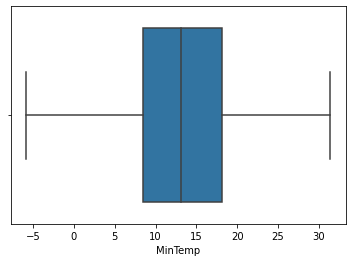

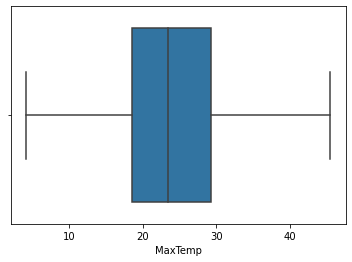

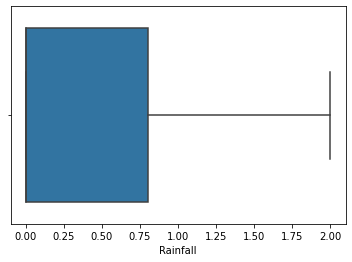

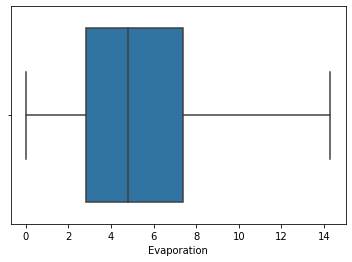

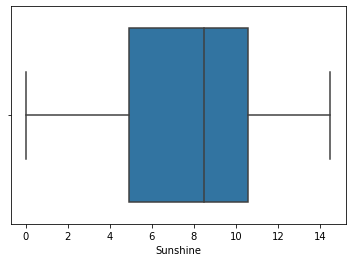

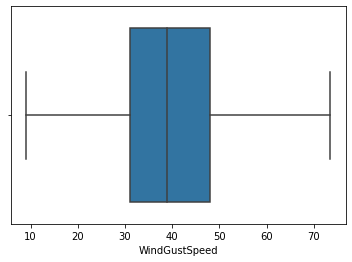

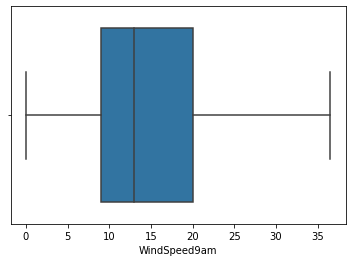

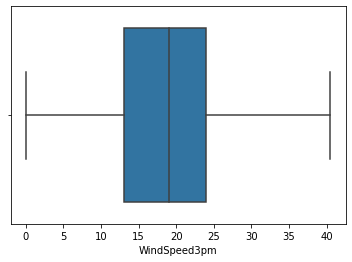

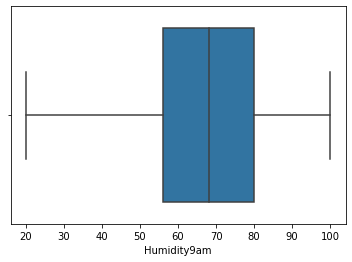

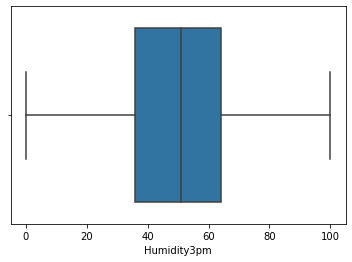

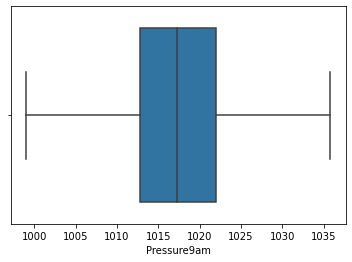

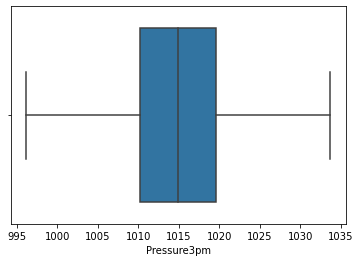

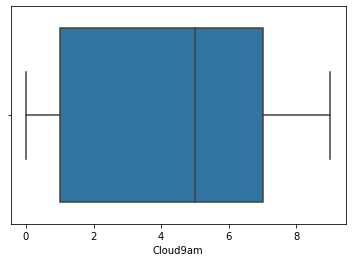

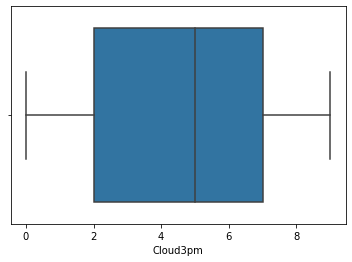

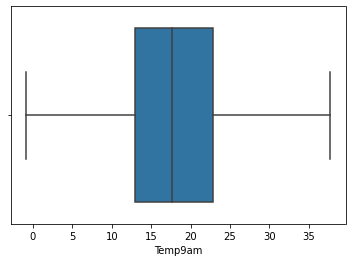

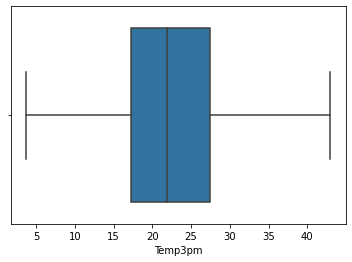

In [29]:
for col in data.select_dtypes(include=float).columns:
    plt.figure()
    sns.boxplot(x=data[col])
plt.show()

Maka setelah di cek kembali melalui visualisasi boxplot, tidak ada outlier lagi.

## Exploratory Data Analysis

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use(['ggplot'])

### Lokasi paling sering hujan

In [31]:
five_location_rain = pd.DataFrame((data['RainToday'] == 'Yes').groupby(data['Location']).sum().sort_values(ascending=False)).head()

In [32]:
five_location_rain

,RainToday
Location,
Portland,840
Darwin,814
Cairns,765
MountGambier,756
NorfolkIsland,755


Text(0.5, 1.0, '5 locations with the most rain in 10 years')

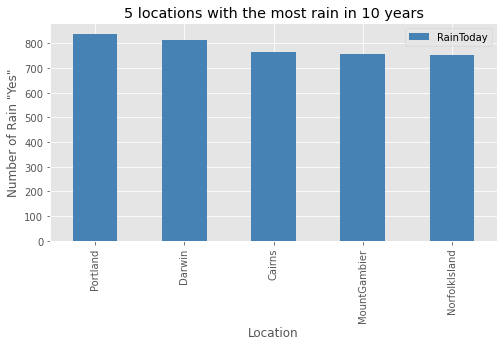

In [33]:
five_location_rain.plot(kind='bar',
                        figsize=(8, 4),
                        color='steelblue')

plt.ylabel('Number of Rain "Yes"')
plt.title('5 locations with the most rain in 10 years')

Pada data diatas, terlihat 5 tempat paling sering ujan di Australia dalam 10 tahun. Pada peringkat pertama ada Portland dengan total 840 dan diikuti oleh Kota Darwin dengan 814 kali hujan.

### Distribusi RainTomorrow

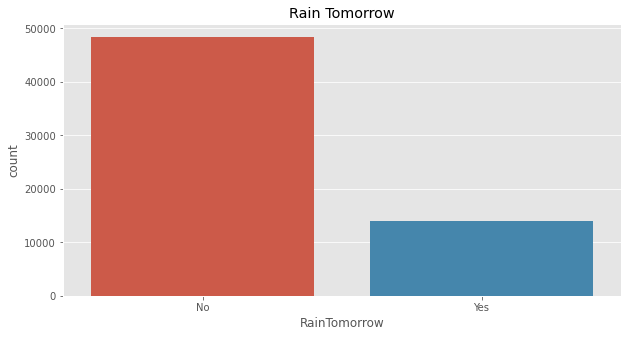

In [34]:
plt.figure(figsize=(10, 5))

sns.countplot(x='RainTomorrow', data=data)
plt.title('Rain Tomorrow')

plt.show()

In [35]:
data['RainTomorrow'].value_counts()

No     48385
Yes    13909
Name: RainTomorrow, dtype: int64

Pada grafik diatas, terdapat 48383 data tidak hujan atau No, menunjukan bahwa pada kolom <b>RainTomorrow</b> terlihat jelas bahwa value No sangat banyak. Artinya, lebih banyak tidak hujan pada keesokannya daripada hujan.

### Distribusi Curah Hujan

<AxesSubplot:xlabel='Day', ylabel='Rainfall'>

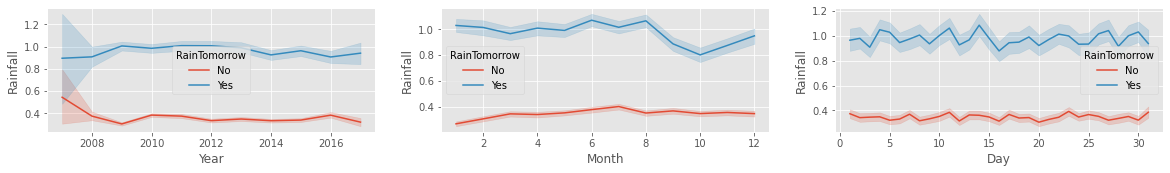

In [36]:
plt.figure(figsize=(20, 5))

plt.subplot(2, 3, 1)
sns.lineplot(x='Year', y='Rainfall', hue='RainTomorrow', data=data)

plt.subplot(2, 3, 2)
sns.lineplot(x='Month', y='Rainfall', hue='RainTomorrow', data=data)

plt.subplot(2, 3, 3)
sns.lineplot(x='Day', y='Rainfall', hue='RainTomorrow', data=data)

Grafik diatas menunjukan distribusi curah hujan mulai dari tahun, bulan, hari.

## Data Preprocessing

In [37]:
data.drop(columns=['Date', 'Year', 'Month', 'Day'], inplace=True)

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,Cobar,18.4,28.9,0.0,14.3,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,20.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [40]:
label = LabelEncoder()

In [41]:
data['RainToday'] = label.fit_transform(data['RainToday'])
data['RainTomorrow'] = label.fit_transform(data['RainTomorrow'])

### Feature Selection

Mari kita lihat attribute atau kolom mana saja yang hubungannya paling dekat dengan target yaitu <b>RainTomorrow</b>, disini heatmap akan digunakan untuk mempermudah pencariannya.

<AxesSubplot:>

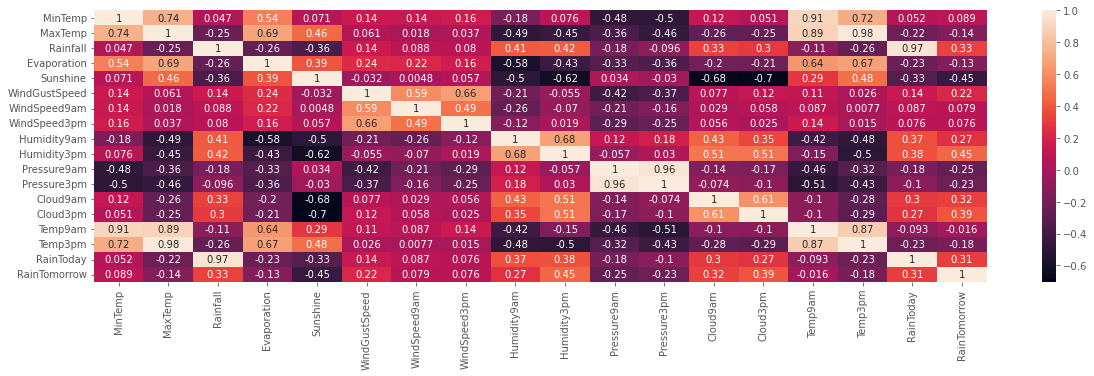

In [42]:
plt.figure(figsize=(20, 5))
sns.heatmap(data.corr(), annot=True)

Dari heatmap diatas terlihat jelas

1. Rainfall  = (0.33)
2. Humidity9am = (0.27)
3. Humidity3pm = (0.45)
4. Cloud9am = (0.32)
5. Cloud3pm = (0.39)
6. RainToday = (0.31)
7. Sunshine = (-0.45) + 78 79
8. WindgustSpeed = (0.22) +
9. Pressure9am = (-0.25)
10. Pressure3pm = (-0.23)

### Final Data

In [43]:
final_data = data[["RainTomorrow", "RainToday", "Cloud9am", "Cloud3pm", "Humidity9am", "Humidity3pm", "Rainfall", "Sunshine", "WindGustSpeed", "Pressure9am", "Pressure3pm"]]

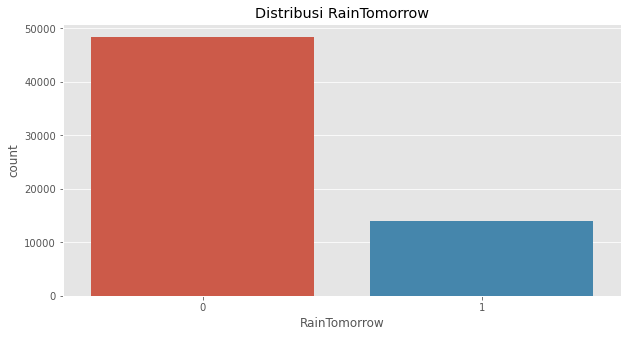

In [44]:
plt.figure(figsize=(10, 5))

sns.countplot(x='RainTomorrow', data=final_data)
plt.title('Distribusi RainTomorrow')

plt.show()

### Scaling Data

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
X = final_data.drop(columns='RainTomorrow')
y = final_data['RainTomorrow']

In [47]:
X = scaler.fit_transform(X)

### Resampling Data - Under Sampling

Resampling dilakukan agar data seimbang. Digunakan pada dataset yang memiliki imbalanced class. Pada dataset ini, terlihat jelas pada Target <b>RainTomorrow</b> sangat berbeda jauh antara data yang hujan atau tidak. Maka dilakukan resampling menggunakan scikitlearn resample. Data dibawah ini akan dilakukan resampling dengan metode under sampling, yaitu menghapus data major agar supaya datanya balanced dengan data minor

In [48]:
# import the Random Under Sampler object.
from imblearn.under_sampling import RandomUnderSampler

# create the object.
under_sampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# fit the object to the training data.
x_train_under, y_train_under = under_sampler.fit_resample(X, y)

In [49]:
y_train_under.value_counts()

0    13909
1    13909
Name: RainTomorrow, dtype: int64

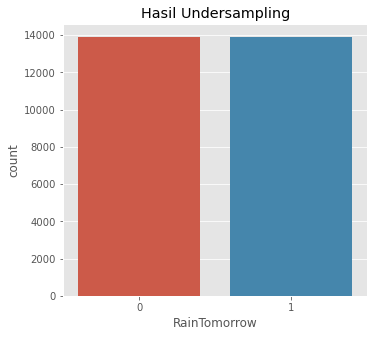

In [50]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train_under)
plt.title('Hasil Undersampling')


plt.show()

### Splitting Data
Membagi data menjadi 80% untuk training dan 20% untuk testing.

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train_under, y_train_under, test_size=0.2)

Data diatas sudah dilakukan UnderSampling dan Oversampling, <b>Undersampling</b> yaitu membuat data yang major untuk mengikuti data yang minor dengan cara menghapus data secara random agar data menjadi balanced. Sedangkan <b>Oversampling</b> kebalikannya dari undersampling. Membuat data yang minor untuk mengikuti data yang major, dengan cara menambahkan duplikasi data. Hal ini dilakukan agar pada saat modeling tidak terjadi bias yang dikarenakan imbalanced class.

## Modeling
Pada modelling kali ini kita akan membandingkan antara algoritma Logistic Regression dengan Support Vector Machine (SVM) untuk melakukan prediksi terkait "Apakah besok hujan?"

In [53]:
# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

### Logistic Regression

In [54]:
logres = LogisticRegression()
logres.fit(X_train, y_train)

lr_pred = logres.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

Accuracy Score:  0.8026599568655644
[[2282  533]
 [ 565 2184]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      2815
           1       0.80      0.79      0.80      2749

    accuracy                           0.80      5564
   macro avg       0.80      0.80      0.80      5564
weighted avg       0.80      0.80      0.80      5564



### Hyperparameters Tuning - Logistic Regression

In [55]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [56]:
# List Parameter yang akan diuji
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define model and parameters
hyperparameters = dict(solver=solvers, penalty=penalty, C=c_values)
logreg = LogisticRegression()


grid_search = GridSearchCV(estimator=logreg, param_grid=hyperparameters, n_jobs=-1, cv=10, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

#Prediksi menggunakan model baru
y_pred_lr_hyper = grid_result.predict(X_test)

#Check performa dari model
print('Accuracy Score: ', accuracy_score(y_test, y_pred_lr_hyper))
print(classification_report(y_test, y_pred_lr_hyper))
roc_auc_score(y_test, y_pred_lr_hyper)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Accuracy Score:  0.8026599568655644
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      2815
           1       0.80      0.79      0.80      2749

    accuracy                           0.80      5564
   macro avg       0.80      0.80      0.80      5564
weighted avg       0.80      0.80      0.80      5564

Best: 0.791273 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.791003 (0.010767) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.791003 (0.010767) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.791093 (0.010754) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.791048 (0.010800) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.791048 (0.010800) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.791048 (0.010800) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.791228 (0.010675) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.791273 (0.010610) with: {'C': 1.0, 'pen

Disini kita mencoba melakukan hypertuning parameter pada model menggunakan GridSearch. Akurasi mulai membaik namun tidak signifikan

### Support Vector Machine

In [57]:
# Support Vector Machine (SVM)
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
        
pred_svm = svm_model.predict(X_test)

In [58]:
print("Accuracy Score:", accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

Accuracy Score: 0.807332854061826
[[2259  556]
 [ 516 2233]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      2815
           1       0.80      0.81      0.81      2749

    accuracy                           0.81      5564
   macro avg       0.81      0.81      0.81      5564
weighted avg       0.81      0.81      0.81      5564



Disini saya tidak melakukan tuning hyperparameter pada model SVM. Karena proses ini akan memakan banyak resource pada device, dan memakan waktu yang sangat lama karna sudah saya coba.

### Evaluate Model

In [59]:
print("Logistic Regression:", accuracy_score(y_test, y_pred_lr_hyper))
print("SVM:", accuracy_score(y_test, pred_svm))

Logistic Regression: 0.8026599568655644
SVM: 0.807332854061826


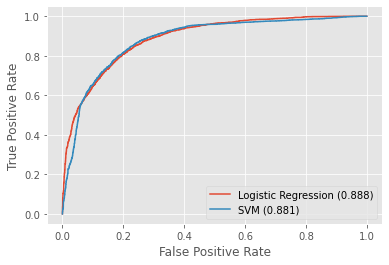

In [60]:
#define metrics
y_pred_proba1 = grid_result.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba1)
auc1 = auc(fpr1, tpr1)

y_pred_proba2 = svm_model.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba2)
auc2 = auc(fpr2, tpr2)

#create ROC curve
plt.plot(fpr1,tpr1, label='Logistic Regression (%0.3f)' % auc1)
plt.plot(fpr2,tpr2, label='SVM (%0.3f)' % auc2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

plt.show()

## Predictive System

Data yang dibutuhkan pada input data. <br>
final_data = "RainToday", "Cloud9am", "Cloud3pm", "Humidity9am", "Humidity3pm", "Rainfall", "Sunshine", "WindGustSpeed", "Pressure9am", "Pressure3pm"

In [61]:
input_data = [0, 3.0, 2.0, 30.0, 43.0, 2.0, 10.0, 2.0, 9.0, 10.0]

In [62]:
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
sample_scale = scaler.transform(input_data_reshape)
prediction = grid_result.predict(sample_scale)

In [63]:
print(prediction)

if (prediction == 1):
    print("Besok akan hujan")
else:
    print("Tidak akan hujan")

[1]
Besok akan hujan


## Saving Model

In [64]:
import pickle

In [65]:
pickle.dump(grid_result, open('best_model_logreg.pkl', 'wb'))

In [66]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))